In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os


In [3]:
hek = pd.read_excel("invivo_hek293_kinases_plus_classifications.xlsx")
hela = pd.read_excel("invivo_hela_kinases_plus_classifications.xlsx")
intensities = pd.read_csv("20250716_173946_invivo_ABPP_kinases_XO44_Hek293_HeLa_Report.csv")


In [4]:
intensities['average_hek293_X044_invivo'] = intensities[['[4] Hek293_XO44_invivo_1.raw.PG.Quantity','[5] Hek293_XO44_invivo_2.raw.PG.Quantity','[6] Hek293_XO44_invivo_3.raw.PG.Quantity']].mean(axis=1)
intensities['average_hela_X044_invivo'] = intensities[['[10] HeLa_XO44_invivo_1.raw.PG.Quantity', '[11] HeLa_XO44_invivo_2.raw.PG.Quantity', '[12] HeLa_XO44_invivo_3.raw.PG.Quantity']].mean(axis=1)

In [5]:
# intensities[['PG.Genes', 'average_hek293_X044_invivo', 'average_hela_X044_invivo']]
intensities.columns
# intensities[intensities
#     ['PG.Genes']=='MAST2']


hek_merged = pd.merge(intensities[['PG.Genes', 'PG.ProteinGroups','average_hek293_X044_invivo']], hek[['Genes','Kinase Classification']], left_on="PG.Genes", right_on="Genes", how="right")
hela_merged = pd.merge(intensities[['PG.Genes', 'PG.ProteinGroups','average_hela_X044_invivo']], hela[['Genes', 'Kinase Classification']], left_on="PG.Genes", right_on="Genes", how="right")

TK
Atypical
Other
TKL
not in kinbase
AGC
CMGC
CAMK
CK1
PKL
NDK
STE


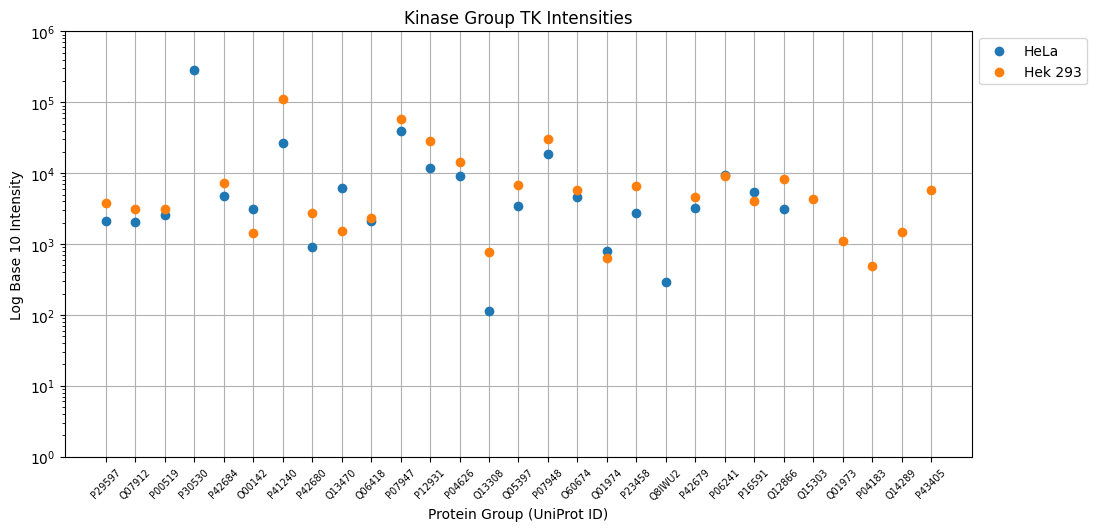

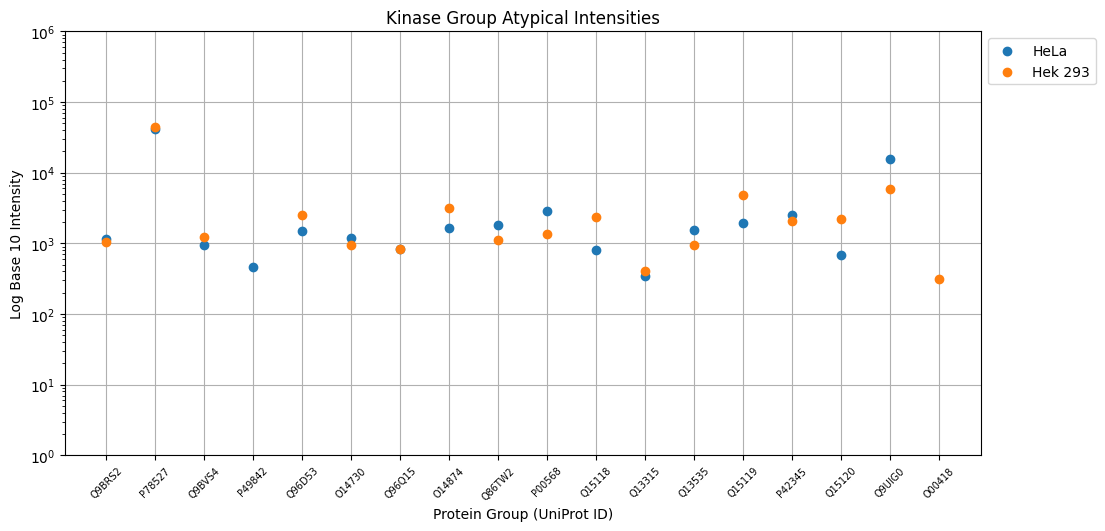

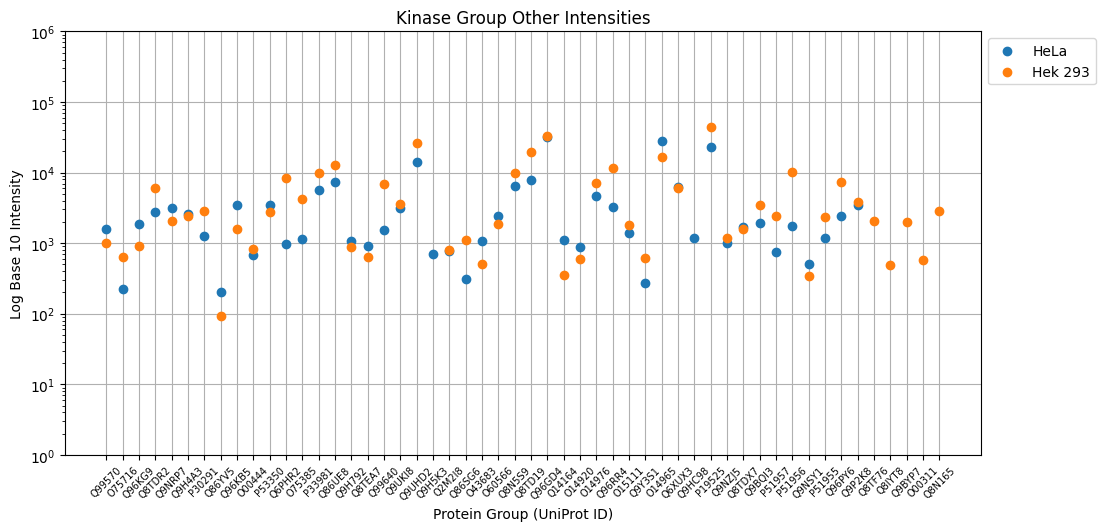

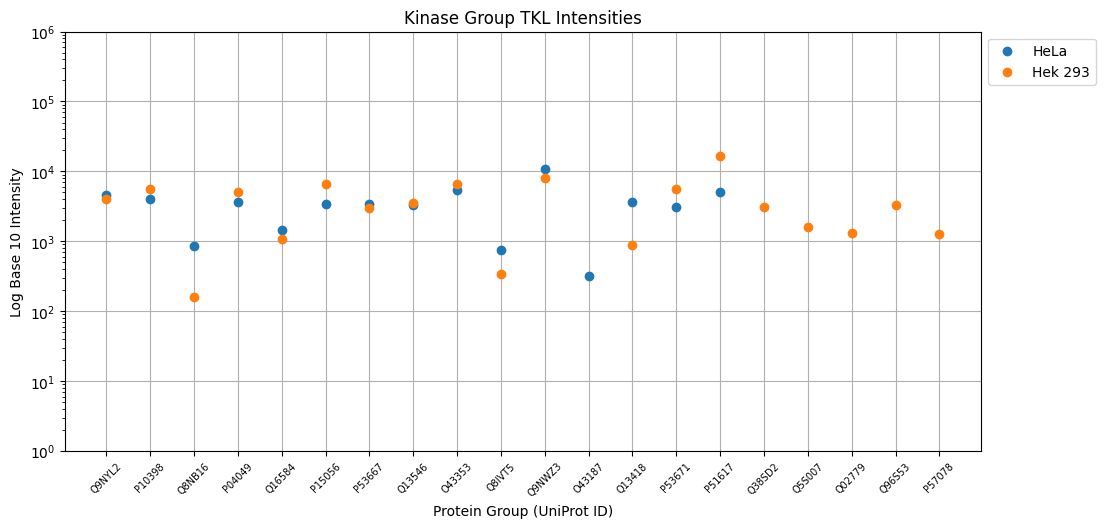

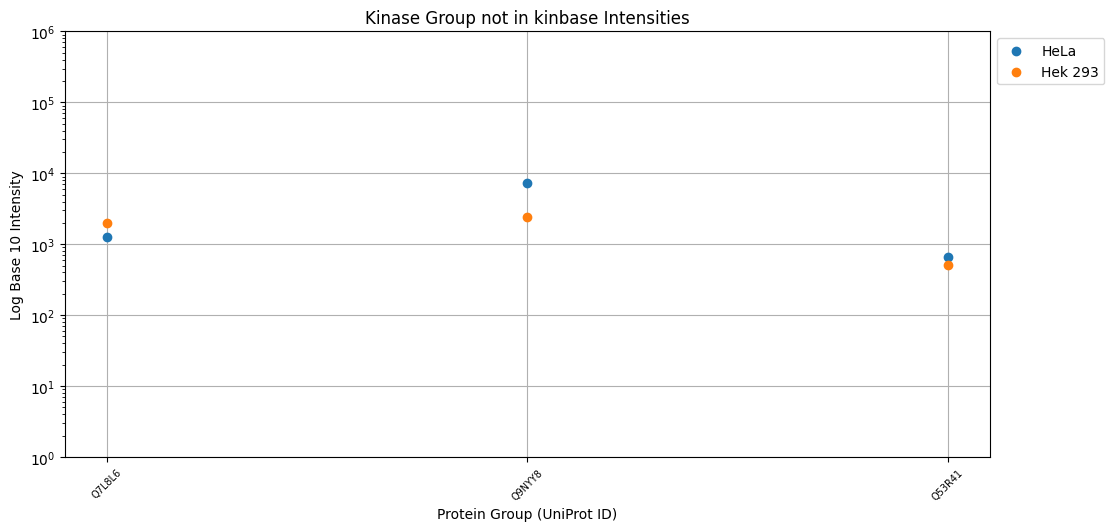

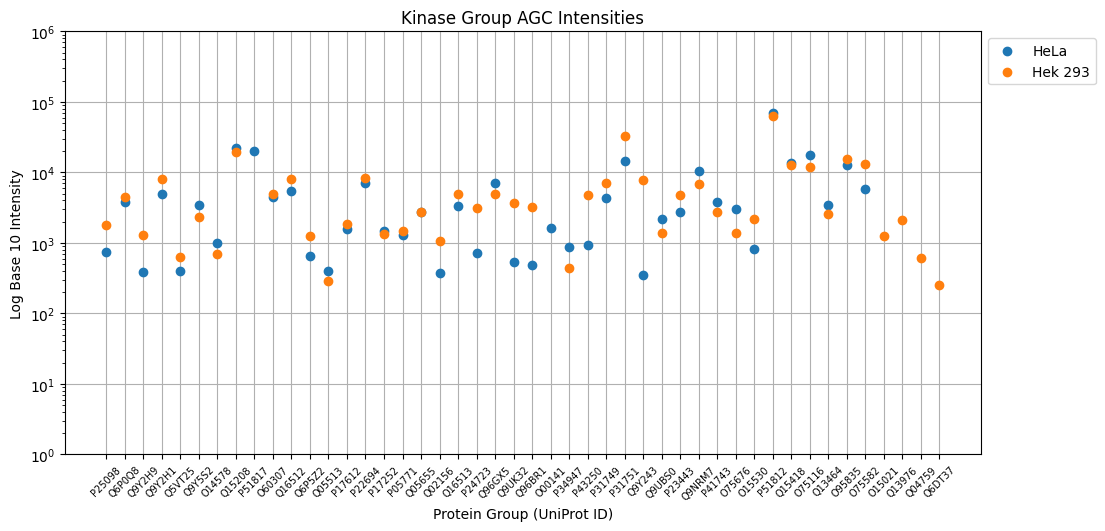

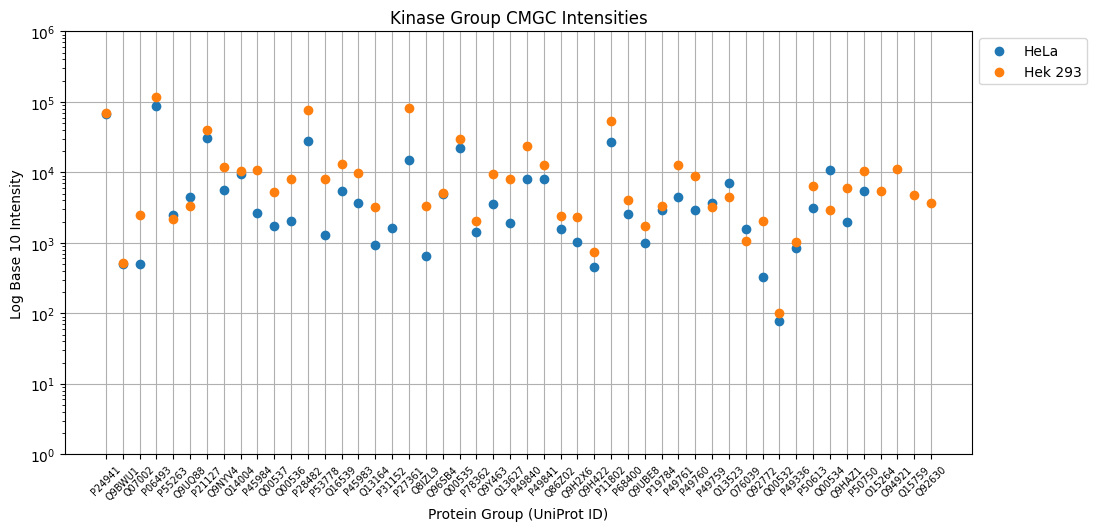

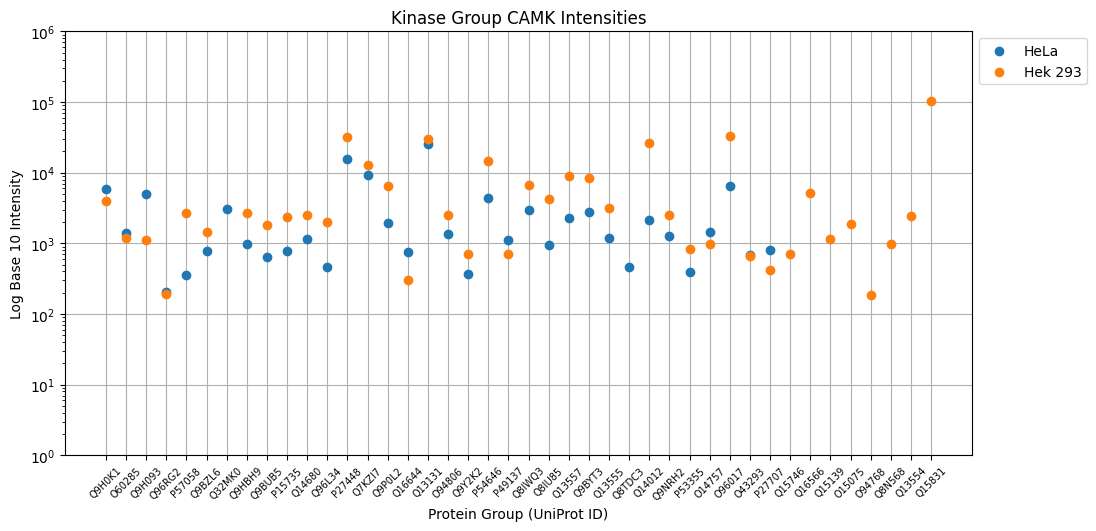

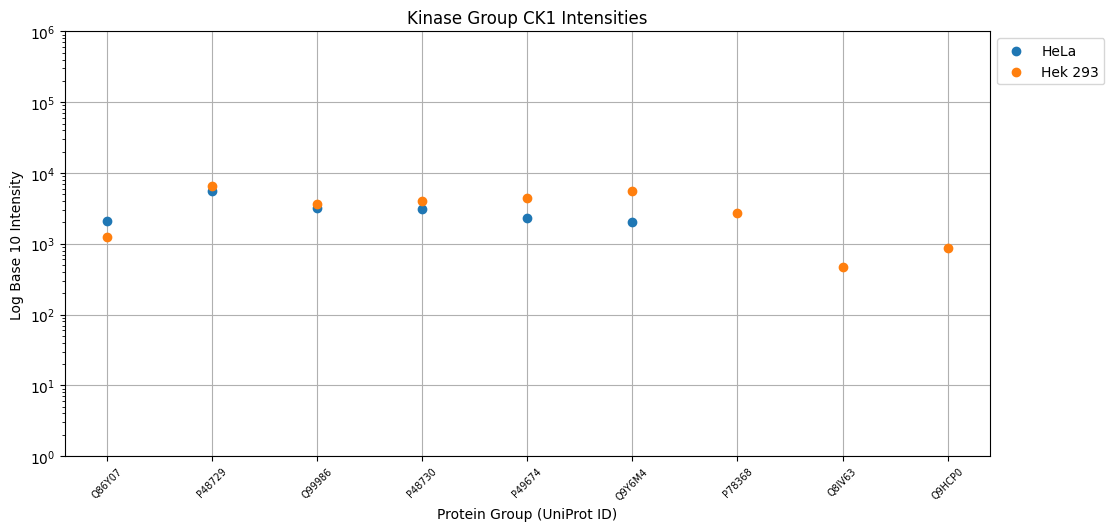

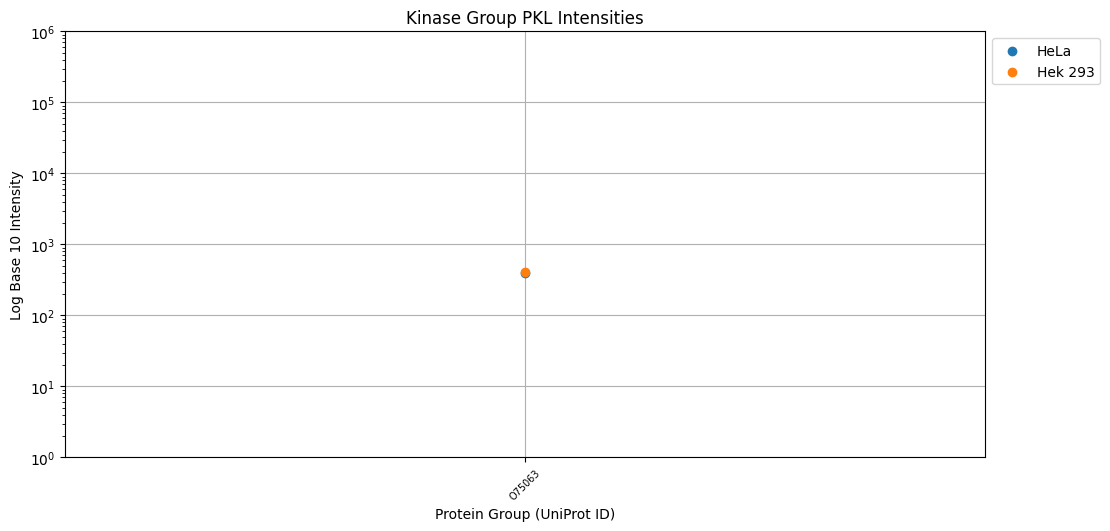

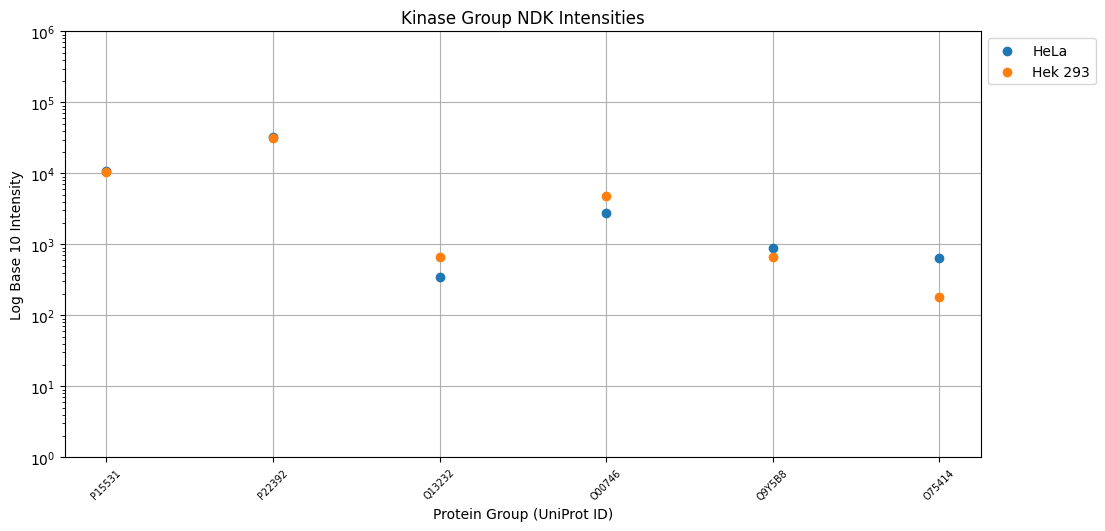

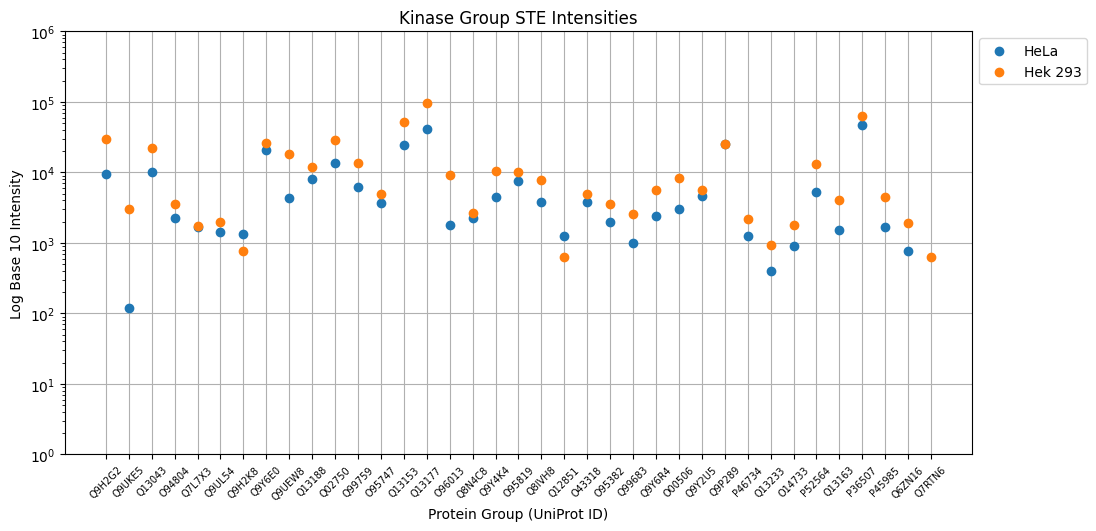

In [22]:
unique_kinases= list(set(hek_merged['Kinase Classification'].unique().tolist() + hela_merged['Kinase Classification'].unique().tolist()))
unique_kinases = [k for k in unique_kinases if not pd.isna(k)]
# unique_kinases.remove("not kinase")

for kinase in unique_kinases:
    print(kinase)
    hek_graphDf = hek_merged[hek_merged["Kinase Classification"] == kinase]
    hela_graphDf = hela_merged[hela_merged["Kinase Classification"] == kinase]
    plt.figure(figsize=(10, 5))
    plt.grid(True,zorder=0)
    plt.scatter(hela_graphDf['PG.ProteinGroups'], hela_graphDf['average_hela_X044_invivo'], label = "HeLa", alpha=1,zorder=3)
    plt.scatter(hek_graphDf['PG.ProteinGroups'], hek_graphDf['average_hek293_X044_invivo'], label="Hek 293",alpha=1,zorder=3)
    plt.xticks(rotation=45)  # Rotate labels by 45 degrees
    plt.xticks(fontsize=7)
    plt.tight_layout()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    title = "Kinase Group "+ str(kinase) +" Intensities"
    plt.title(title)
    plt.ylabel("Log Base 10 Intensity")
    plt.xlabel("Protein Group (UniProt ID)")
    plt.yscale('log', base=10)
    plt.ylim(1, 10**6)
    os.makedirs("log10Grid", exist_ok=True)
    plt.savefig(str("log10Grid/" + kinase + "_log10_Grid_scatterplot.tiff"), dpi=300, bbox_inches='tight')

In [12]:
# list(set(hek_merged['Kinase Classification'].unique().tolist() + hela_merged['Kinase Classification'].unique().tolist()))
hela_merged['average_hela_X044_invivo'].max()


np.float64(285688.8125)

In [13]:
hek_merged['average_hek293_X044_invivo'].max()


np.float64(136823.26041666666)